In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [2]:
x=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','L101300']]

In [3]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [4]:
data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1')
# data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

In [5]:
# data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
# data=data[data.AGE>=40]
# data=data[data.AGE<50]

print(data.shape)

(159381, 408)


In [6]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [9]:
corr=data[numerical_cols].corr()
corr=corr.L101300_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
278,L101300_y,1.000000
134,L393800,1.000000
116,L303201,0.948683
214,S000400,0.875541
260,S004416,0.771532


In [10]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [11]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
0,L101300_y,1.000000,159250
11,L101300_x,0.565330,159247
17,L101700,0.366866,158951
19,S000300,0.362150,159075
20,L101200,0.349861,159247
22,L190400,0.317591,159241
23,SEX,0.311244,159381
24,L100700,0.311123,152474
26,L103300,0.306169,135222
27,L190500,0.304180,159204


In [12]:
print(list(mergedColCorrCount.head(20).Col))

['L101300_y', 'L101300_x', 'L101700', 'S000300', 'L101200', 'L190400', 'SEX', 'L100700', 'L103300', 'L190500', 'L190300', 'L103000', 'L103100', 'S000501', 'S000100', 'L100500', 'S000502', 'L100800', 'L101600', 'L101400']


Anova test - For categorical values [Questionnaire answers]
=======

In [13]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
#                                   'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
#                                  'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
#                                  'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
#                                  'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
#                                   'FIELD_137','FIELD_138','FIELD_139','FIELD_140'])


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [14]:
colslist=mydataset.columns
DiabeticColVals=data.L101300_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [15]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [16]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
23,FIELD_33,1439.556667,0.000000e+00,158937
28,FIELD_38,274.039191,0.000000e+00,158945
29,FIELD_40,84.180695,8.524892e-123,158951
2,FIELD_5,68.358387,3.395845e-85,66833
22,FIELD_32,59.710770,4.346947e-86,158737
30,FIELD_41,43.209282,2.068606e-61,158921
19,FIELD_29,38.089957,6.771901e-10,159232
21,FIELD_31,29.425390,5.819563e-08,159233
11,FIELD_21,10.004247,1.562090e-03,159233
8,FIELD_18,6.916688,8.540322e-03,159232


In [17]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_5', 'FIELD_32', 'FIELD_41', 'FIELD_29', 'FIELD_31', 'FIELD_21', 'FIELD_18']


========================= LASSO method
================

In [18]:
selectedcols=['L101300_y', 'L101300_x', 'L101700', 'S000300', 'L101200', 'L190400', 'SEX', 'L100700', 'L103300', 
              'L190500', 'L190300', 'L103000', 'L103100', 'S000501', 'S000100', 'L100500', 'S000502', 'L100800', 
              'L101600', 'L101400','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_5', 'FIELD_32', 'FIELD_41', 
              'FIELD_29', 'FIELD_31', 'FIELD_21', 'FIELD_18'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(45885, 30)


In [19]:
x=data2[['L101300_x', 'L101700', 'S000300', 'L101200', 'L190400', 'SEX', 'L100700', 'L103300', 
              'L190500', 'L190300', 'L103000', 'L103100', 'S000501', 'S000100', 'L100500', 'S000502', 'L100800', 
              'L101600', 'L101400','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_5', 'FIELD_32', 'FIELD_41', 
              'FIELD_29', 'FIELD_31', 'FIELD_21', 'FIELD_18'
        ]]
y=data2.L101300_y

In [20]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 0.5437234   0.05561149  0.52270966 -0.25222792  0.39889375 -0.
  0.22898075  0.13828023  0.10872562  0.          0.00580642 -0.03375828
  0.02129639  0.04826351 -0.         -0.          0.0159327   0.00724417
  0.00658624  0.0715827  -0.06549506  0.03678043  0.51998011 -0.53730156
  0.         -0.          0.          0.          0.        ]
-22.592742822905834


,Name,coeff
0,L101300_x,0.543723
23,FIELD_32,0.537302
2,S000300,0.522710
22,FIELD_5,0.519980
4,L190400,0.398894
3,L101200,0.252228
6,L100700,0.228981
7,L103300,0.138280
8,L190500,0.108726
19,FIELD_33,0.071583


In [27]:
print(list(lassod.Name[:16]))

['L101300_x', 'FIELD_32', 'S000300', 'FIELD_5', 'L190400', 'L101200', 'L100700', 'L103300', 'L190500', 'FIELD_33', 'FIELD_38', 'L101700', 'S000100', 'FIELD_40', 'L103100', 'S000501']


=============================== SelectKBest method
========================

In [22]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:16]))

['L101300_x', 'L101700', 'S000300', 'L101200', 'L190400', 'SEX', 'L100700', 'L103300', 'L190500', 'L190300', 'L103000', 'L103100', 'S000501', 'S000100', 'L100500', 'S000502']


========================================= LinearSVC
===============

In [23]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [24]:
# x.dtypes

================================ SequentialFeatureSelector 
================================

In [25]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.24624476 0.04309862 0.05321725 0.05142395 0.02047339 0.09095443
 0.02997923 0.02835731 0.01854557 0.02277903 0.02929759 0.02692619
 0.02484793 0.0268529  0.03092706 0.02432786 0.02882118 0.02849426
 0.02274184 0.02751028 0.01974874 0.01778169 0.02342476 0.02313063
 0.01715836 0.008561   0.00724144 0.0004337  0.00669907]


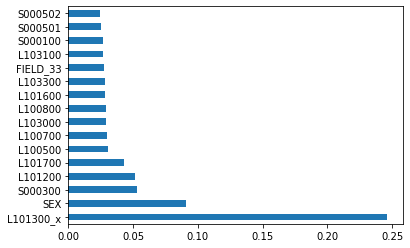

Index(['L101300_x', 'SEX', 'S000300', 'L101200', 'L101700', 'L100500',
       'L100700', 'L103000', 'L100800', 'L101600', 'L103300', 'FIELD_33',
       'L103100', 'S000100', 'S000501', 'S000502'],
      dtype='object')


In [26]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(16).index)

============================= Backward Elimination
========

In [41]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              L102900_y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     320.2
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:04:31   Log-Likelihood:                -38077.
No. Observations:                8339   AIC:                         7.621e+04
Df Residuals:                    8310   BIC:                         7.642e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L102900_x      0.7130      0.047     15.146      0.000       0.621       0.805
L103200       -0.0515      0.066     -0.781      0.435      -0.181       0.078
L103300        3.1978      1.151      2.778      0.005       0.941       5.454
L103000       -0.0007      0.015     -0.048      0.962      -0.030       0.029
max           -0.1456      0.872     -0.167      0.867      -1.854       1.563
L101100      -15.3011      2.947     -5.191      0.000     -21.079      -9.524
S000300        0.1125      0.103      1.090      0.276      -0.090       0.315
L104600        1.7884      0.944      1.895      0.058      -0.062       3.638
AGE            0.2745      0.041      6.685      0.000       0.194       0.355
L101700        0.0186      0.021      0.882      0.378      -0.023       0.060
L100800       -0.1072      0.033     -3.242      0.001      -0.172      -0.042
L100700       -1.0873      0.322     -3.378      0.001      -1.718      -0.456
S000501        0.0390      0.033      1.171      0.241      -0.026       0.104
S000502       -0.0634      0.045     -1.399      0.162      -0.152       0.025
L101300       -0.0364      0.020     -1.822      0.068      -0.076       0.003
L190500       -0.4613      0.323     -1.429      0.153      -1.094       0.171
L190400        1.1414      0.744      1.533      0.125      -0.318       2.601
L190300       -2.8769      1.287     -2.235      0.025      -5.400      -0.354
FIELD_21       1.3638      7.728      0.176      0.860     -13.784      16.512
FIELD_33       1.1561      0.729      1.585      0.113      -0.274       2.586
FIELD_14      -9.9340      6.077     -1.635      0.102     -21.847       1.978
FIELD_27      -0.4301      1.054     -0.408      0.683      -2.496       1.635
FIELD_38       0.1507      0.274      0.550      0.582      -0.386       0.688
FIELD_28       2.6582      1.088      2.443      0.015       0.526       4.791
FIELD_25      -3.3660      2.437     -1.381      0.167      -8.144       1.412
FIELD_4       -0.4569      0.208     -2.197      0.028      -0.865      -0.049
FIELD_18       0.0036      2.152      0.002      0.999      -4.215       4.223
FIELD_31       0.1721      0.714      0.241      0.810      -1.227       1.572
const         62.9339      7.115      8.845      0.000      48.986      76.881
==============================================================================
Omnibus:                      549.734   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1599.597
Skew:                           0.341   Prob(JB):                         0.00
Kurtosis:                       5.034   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [27]:
# temp=temp.drop(columns=['L103100', 'S000300','L190400','L102900','L101300','S000501','S000502','L100500','FIELD_40',
#                         'FIELD_41','FIELD_29','FIELD_18','FIELD_31','FIELD_27','FIELD_25','SEX'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [28]:
# temp=temp.drop(columns=['FIELD_33'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [29]:
print(temp.columns.shape)
temp.columns

(30,)


Index(['L102900_x', 'L103200', 'L103300', 'L103000', 'max', 'L101100',
       'S000300', 'L104600', 'AGE', 'B_DAY', 'L101700', 'L100800', 'L100700',
       'S000501', 'S000502', 'L101300', 'L190500', 'L190400', 'L190300',
       'FIELD_21', 'FIELD_33', 'FIELD_14', 'FIELD_27', 'FIELD_38', 'FIELD_28',
       'FIELD_25', 'FIELD_4', 'FIELD_18', 'FIELD_31', 'const'],
      dtype='object')

================== Check Variance inflation factor and multi collinearity
==================== 

In [30]:
temppd=pd.DataFrame(data2[['S000501_x', 'S000502', 'S000300', 'SEX', 'L190400', 'L190300', 'L190500', 'L100700', 
              'L103300', 'L100500', 'S000100', 'L100800', 'L103000', 'L101700', 'L101300', 'L103100', 'max',
              'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_29', 'FIELD_41', 'FIELD_27', 'FIELD_42', 'FIELD_5', 
              'FIELD_18', 'FIELD_25'
                          ]]).dropna()  
temppd['y']=data.S000501_y
 

corr = (temppd.corr())
sns.heatmap(corr, vmin=-1, vmax=1) 

corr.head(20)

KeyError: "['L100500', 'S000501_x', 'FIELD_29', 'FIELD_5', 'L103100', 'SEX', 'S000100', 'FIELD_42', 'FIELD_40', 'FIELD_41'] not in index"

In [31]:

def vifcal(inputdata,depcol):
    vifL5=[]
    import statsmodels.formula.api as sm
    xvars=inputdata.drop([depcol],axis=1)
    xvarnames=xvars.columns
    for i in range(0,xvarnames.shape[0]):
        _y=xvars[xvarnames[i]]
        _x=xvars[xvarnames.drop(xvarnames[i])]
        rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(i,', ',xvarnames[i]," VIF = ",vif)
        if(vif<5):
            vifL5.append(xvarnames[i])
    return vifL5
    
    
newcols = vifcal(temppd,'y')

NameError: name 'temppd' is not defined

In [32]:
print(newcols,len(newcols))

NameError: name 'newcols' is not defined